In [1]:
import pandas as pd 
import json
import torch
import matplotlib.pyplot as plt
import numpy as np


In [2]:
grid_search_res = pd.read_csv('best_ckpts/grid_results_short.csv')
grid_search_res

,hidden_dim,lr,weight_decay,dropout,cfg_id,best_F1,epochs_ran
0,256,0.0010,0.00002,0.5,6b3b9faa,0.990862,8
1,256,0.0010,0.00001,0.4,a207c8ec,0.990733,10
2,128,0.0010,0.00002,0.4,85686737,0.990421,9
3,256,0.0005,0.00001,0.4,292efb59,0.989240,10
4,128,0.0005,0.00002,0.4,f1ed75eb,0.989230,10
5,128,0.0010,0.00002,0.5,883cf59c,0.988970,10
6,128,0.0005,0.00001,0.4,8f080f64,0.988541,8
7,256,0.0005,0.00002,0.5,f9e4a5b9,0.988449,10
8,128,0.0010,0.00001,0.5,d53d97aa,0.988403,7
9,256,0.0005,0.00001,0.5,f6cb5e97,0.988282,10


In [3]:
best_cfg_trng_hist = pd.read_csv('best_ckpts/training_history.csv')
best_cfg_trng_hist

,epoch,train_loss,val_loss,val_precision,val_recall,val_F1,val_accuracy
0,1,0.193334,0.120629,0.925756,0.990626,0.957093,0.952989
1,2,0.090746,0.068228,0.990415,0.968596,0.979384,0.978417
2,3,0.058735,0.045450,0.978221,0.989454,0.983805,0.982759
3,4,0.039831,0.048580,0.982018,0.985470,0.983741,0.982759
4,5,0.030287,0.041949,0.988941,0.985001,0.986967,0.986232
5,6,0.025853,0.041528,0.990321,0.983126,0.986711,0.985984
6,7,0.020409,0.046762,0.981944,0.994141,0.988005,0.987224
7,8,0.016213,0.041266,0.982172,0.994141,0.988120,0.987348
8,9,0.013920,0.050546,0.988724,0.986407,0.987565,0.986852
9,10,0.012399,0.051512,0.983796,0.996016,0.989868,0.989209


In [6]:

with open("best_ckpts/manifest.json", "r") as f:
    manifest = json.load(f)

print(manifest)

{'seed': 42, 'pad_id': 7, 'max_len': 256, 'hidden_dim': 256, 'num_layers': 2, 'dropout': 0.5, 'bidirectional': True, 'num_classes': 2, 'embedding_matrix_file': 'best_ckpts/embedding_matrix.npy', 'sp_model_path': 'full_220/email_sp.model', 'best_ckpt': 'best_ckpts/best.pt', 'val_threshold': 0.734, 'weight_decay': 2e-05}


In [16]:
ckpt_path = "best_ckpts/best.pt"   # change path if needed
ckpt = torch.load(ckpt_path, map_location="cpu")

# Extract config
config = ckpt.get("config", {})

# Pretty print config
print(json.dumps(config, indent=4))

{
    "seed": 42,
    "batch_size_train": 64,
    "batch_size_eval": 128,
    "hidden_dim": 256,
    "num_layers": 2,
    "dropout": 0.5,
    "bidirectional": true,
    "lr": 0.001,
    "max_epochs": 20,
    "patience": 3,
    "pad_id": 7,
    "max_len": 256,
    "num_classes": 2,
    "weight_decay": 2e-05
}


In [5]:
# 1️⃣ Load existing manifest
with open("best_ckpts/manifest.json", "r") as f:
    manifest = json.load(f)

# 2️⃣ Update the value
manifest["weight_decay"] = 2e-5    # or whatever new value you want

# 3️⃣ Save it back to the same file
with open("best_ckpts/manifest.json", "w") as f:
    json.dump(manifest, f, indent=4)  # indent optional, just for readability

print("✅ Updated weight_decay =", manifest["weight_decay"])

✅ Updated weight_decay = 2e-05


Best F1 @ epoch 10: 0.9899
Lowest val loss @ epoch 8: 0.0413


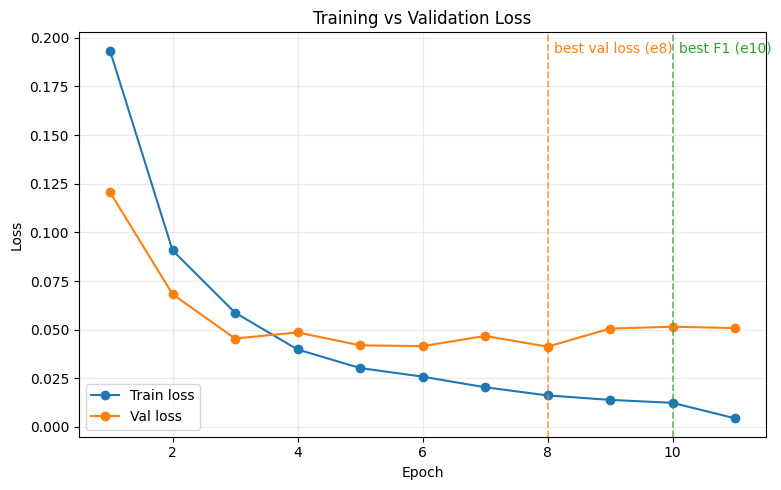

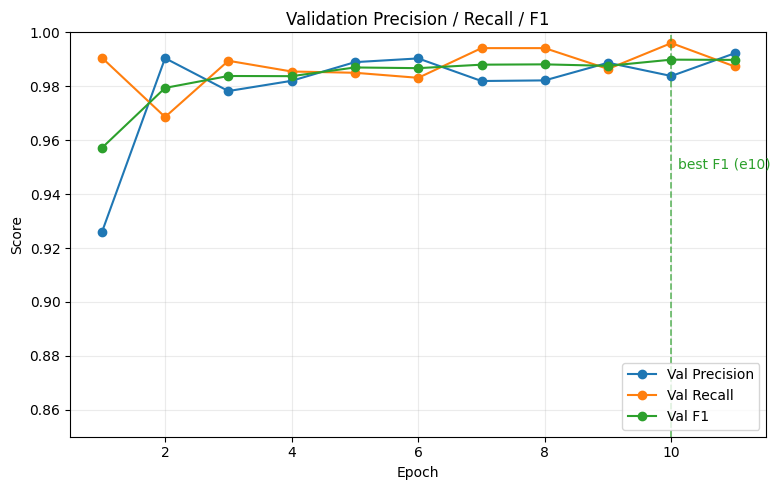

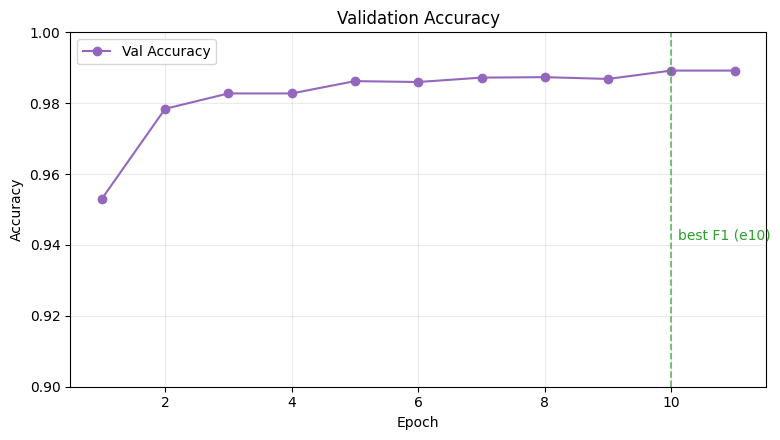

In [6]:
# Load your history
best_cfg_trng_hist = pd.read_csv('best_ckpts/training_history.csv')

# Locate key epochs
best_f1_idx   = int(best_cfg_trng_hist['val_F1'].idxmax())
best_f1_epoch = int(best_cfg_trng_hist.loc[best_f1_idx, 'epoch'])
best_vl_idx   = int(best_cfg_trng_hist['val_loss'].idxmin())
best_vl_epoch = int(best_cfg_trng_hist.loc[best_vl_idx, 'epoch'])

print(f"Best F1 @ epoch {best_f1_epoch}: {best_cfg_trng_hist.loc[best_f1_idx, 'val_F1']:.4f}")
print(f"Lowest val loss @ epoch {best_vl_epoch}: {best_cfg_trng_hist.loc[best_vl_idx, 'val_loss']:.4f}")

# A little helper for consistent styling
def vline(ax, x, label, color):
    ax.axvline(x=x, ls='--', lw=1.25, color=color, alpha=0.7)
    ax.text(x + 0.1, ax.get_ylim()[1]*0.95, label, color=color)

epochs = best_cfg_trng_hist['epoch'].values

# 1) Train vs Val Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, best_cfg_trng_hist['train_loss'], marker='o', label='Train loss')
plt.plot(epochs, best_cfg_trng_hist['val_loss'],   marker='o', label='Val loss')
vline(plt.gca(), best_vl_epoch,  f'best val loss (e{best_vl_epoch})',  'tab:orange')
vline(plt.gca(), best_f1_epoch,  f'best F1 (e{best_f1_epoch})',        'tab:green')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Precision / Recall / F1 across epochs
plt.figure(figsize=(8, 5))
plt.plot(epochs, best_cfg_trng_hist['val_precision'], marker='o', label='Val Precision')
plt.plot(epochs, best_cfg_trng_hist['val_recall'],    marker='o', label='Val Recall')
plt.plot(epochs, best_cfg_trng_hist['val_F1'],        marker='o', label='Val F1')
vline(plt.gca(), best_f1_epoch, f'best F1 (e{best_f1_epoch})', 'tab:green')
plt.title('Validation Precision / Recall / F1')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0.85, 1.0)
plt.grid(True, alpha=0.25)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 3) Accuracy curve
plt.figure(figsize=(8, 4.5))
plt.plot(epochs, best_cfg_trng_hist['val_accuracy'], marker='o', color='tab:purple', label='Val Accuracy')
vline(plt.gca(), best_f1_epoch, f'best F1 (e{best_f1_epoch})', 'tab:green')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()